<a href="https://colab.research.google.com/github/MarcosAutuori/My_Fastai_Book_FastAi_Course/blob/master/05_dataloaders_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#DATALOADERS
https://docs.fast.ai/data.load.html


##IMPORTS FASTBOOK

In [ ]:
! [ -e /content ] && pip install -Uqq fastbook
import fastbook
from fastbook import *

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 20.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 90.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.6/519.6 kB 45.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 80.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 13.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 20.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 15.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 29.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 63.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 85.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 92.6 MB/s eta 0:00:00


In [ ]:
pato = Path('.')

In [ ]:
pato.exists()

True

In [ ]:
pato.ls()

(#3) [Path('.config'),Path('filho'),Path('sample_data')]

In [ ]:
mkdir('filho')

Path('filho')

In [ ]:
patinho = pato/'filho'

In [ ]:
patinho.exists()

True

In [ ]:
ls = path.ls()
imgs = ls[0].ls()

In [ ]:
imgs[3]

Path('/root/.fastai/data/oxford-iiit-pet/images/Bombay_117.jpg')

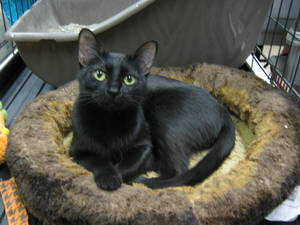

In [ ]:
img = Image.open(imgs[3])
img

In [ ]:
img.save(patinho/'gato.png')

##PETS - 1

In [ ]:
path = untar_data(URLs.PETS)

In [ ]:
Path.BASE_PATH = path

In [ ]:
path.is_absolute(), path.parent

(True, Path('/root/.fastai/data'))

In [ ]:
untar_data??

Abaixo, a construção do `dataloader` começa com `Datablocks`.

In [ ]:
pets = DataBlock(blocks = (ImageBlock, CategoryBlock),
                 get_items=get_image_files,
                 splitter=RandomSplitter(seed=42),  #splitter is a callable which, when called with items, returns a tuple of iterables
                                                    #representing the indices of the training and validation data.
                 get_y=using_attr(RegexLabeller(r'(.+)_\d+.jpg$'), 'name'),
                 item_tfms=Resize(460),
                 batch_tfms=aug_transforms(size=224, min_scale=0.75))

In [ ]:
BatchSize = 256
dls = pets.dataloaders(path/"images", batch_size=BatchSize, shuffle=False, num_workers=2,)

In [ ]:
n_images = len((path/'images').ls())
len_dls_train = len(dls.train)
len_dls_valid = len(dls.valid)
print(n_images, len_dls_train+len_dls_valid)

7393 30


In [ ]:
num_epochs = 2
total_samples = len(dls.dataset)
n_iterations = math.ceil(total_samples/BatchSize)
print(total_samples, n_iterations)

5912 24


In [ ]:
for c, n in enumerate(dls):
  print(f'Dataset#{c} com {len(n)} items')
  for c, (i, l) in enumerate(n):
    if c%5 == 0 or not(c) or i.shape[0] != BatchSize:
      print(f'Batch#{c} | Batch image shape: {i.shape} | Batch label shape: {l.shape} |Shape inage batch[0]: {i[0].shape} | Shape Nome batch[0]: {dls.vocab[l[0].item()]}')
print('Found 7390 items \n 2 datasets of sizes 5912,1478')

Dataset#0 com 24 items
Batch#0 | Batch image shape: torch.Size([256, 3, 224, 224]) | Batch label shape: torch.Size([256]) |Shape inage batch[0]: torch.Size([3, 224, 224]) | Shape Nome batch[0]: saint_bernard
Batch#5 | Batch image shape: torch.Size([256, 3, 224, 224]) | Batch label shape: torch.Size([256]) |Shape inage batch[0]: torch.Size([3, 224, 224]) | Shape Nome batch[0]: japanese_chin
Batch#10 | Batch image shape: torch.Size([256, 3, 224, 224]) | Batch label shape: torch.Size([256]) |Shape inage batch[0]: torch.Size([3, 224, 224]) | Shape Nome batch[0]: samoyed
Batch#15 | Batch image shape: torch.Size([256, 3, 224, 224]) | Batch label shape: torch.Size([256]) |Shape inage batch[0]: torch.Size([3, 224, 224]) | Shape Nome batch[0]: Ragdoll
Batch#20 | Batch image shape: torch.Size([256, 3, 224, 224]) | Batch label shape: torch.Size([256]) |Shape inage batch[0]: torch.Size([3, 224, 224]) | Shape Nome batch[0]: boxer
Batch#23 | Batch image shape: torch.Size([24, 3, 224, 224]) | Batch l

In [ ]:
n_images = len((path/'images').ls()) #7393
# Acima a quantidade de imagens em dls é
# 23*256 + 24 = 5912
# 5*256 + 198 = 1478
# Total 7390
# 3 a menos... ?

In [ ]:
#TRAIN dls[0]
for e in range(num_epochs):
  print(f'Época: {e+1}')
  for c, (i, l) in enumerate(dls.train):
    if c%5 == 0 or not(c) or i.shape[0] != BatchSize:
      print(f'Batch#{c} | Batch image shape: {i.shape} | Batch label shape: {l.shape} |Shape inage batch[0]: {i[0].shape} | Shape Nome batch[0]: {dls.vocab[l[0].item()]}')


Época: 1
Batch#0 | Batch image shape: torch.Size([256, 3, 224, 224]) | Batch label shape: torch.Size([256]) |Shape inage batch[0]: torch.Size([3, 224, 224]) | Shape Nome batch[0]: saint_bernard
Batch#5 | Batch image shape: torch.Size([256, 3, 224, 224]) | Batch label shape: torch.Size([256]) |Shape inage batch[0]: torch.Size([3, 224, 224]) | Shape Nome batch[0]: japanese_chin
Batch#10 | Batch image shape: torch.Size([256, 3, 224, 224]) | Batch label shape: torch.Size([256]) |Shape inage batch[0]: torch.Size([3, 224, 224]) | Shape Nome batch[0]: samoyed
Batch#15 | Batch image shape: torch.Size([256, 3, 224, 224]) | Batch label shape: torch.Size([256]) |Shape inage batch[0]: torch.Size([3, 224, 224]) | Shape Nome batch[0]: Ragdoll
Batch#20 | Batch image shape: torch.Size([256, 3, 224, 224]) | Batch label shape: torch.Size([256]) |Shape inage batch[0]: torch.Size([3, 224, 224]) | Shape Nome batch[0]: boxer
Batch#23 | Batch image shape: torch.Size([24, 3, 224, 224]) | Batch label shape: to

In [ ]:
#VALID dls[1]
for e in range(num_epochs):
  print(f'Época: {e+1}')
  for c, (i, l) in enumerate(dls.valid):
    if c%5 == 0 or not(c) or i.shape[0] != BatchSize:
      print(f'Batch#{c} | Batch image shape: {i.shape} | Batch label shape: {l.shape} |Shape inage batch[0]: {i[0].shape} | Shape Nome batch[0]: {dls.vocab[l[0].item()]}')


Época: 1
Batch#0 | Batch image shape: torch.Size([256, 3, 224, 224]) | Batch label shape: torch.Size([256]) |Shape inage batch[0]: torch.Size([3, 224, 224]) | Shape Nome batch[0]: Persian
Batch#5 | Batch image shape: torch.Size([198, 3, 224, 224]) | Batch label shape: torch.Size([198]) |Shape inage batch[0]: torch.Size([3, 224, 224]) | Shape Nome batch[0]: miniature_pinscher
Época: 2
Batch#0 | Batch image shape: torch.Size([256, 3, 224, 224]) | Batch label shape: torch.Size([256]) |Shape inage batch[0]: torch.Size([3, 224, 224]) | Shape Nome batch[0]: Persian
Batch#5 | Batch image shape: torch.Size([198, 3, 224, 224]) | Batch label shape: torch.Size([198]) |Shape inage batch[0]: torch.Size([3, 224, 224]) | Shape Nome batch[0]: miniature_pinscher


In [ ]:
#Retorna uma imagem aleatória no Dataloader
def RandDLS(DTS):
  n = int(len(DTS.dataset)*random.random())
  return DTS.dataset[n][0],  DTS.vocab[DTS.dataset[n][1].item()]

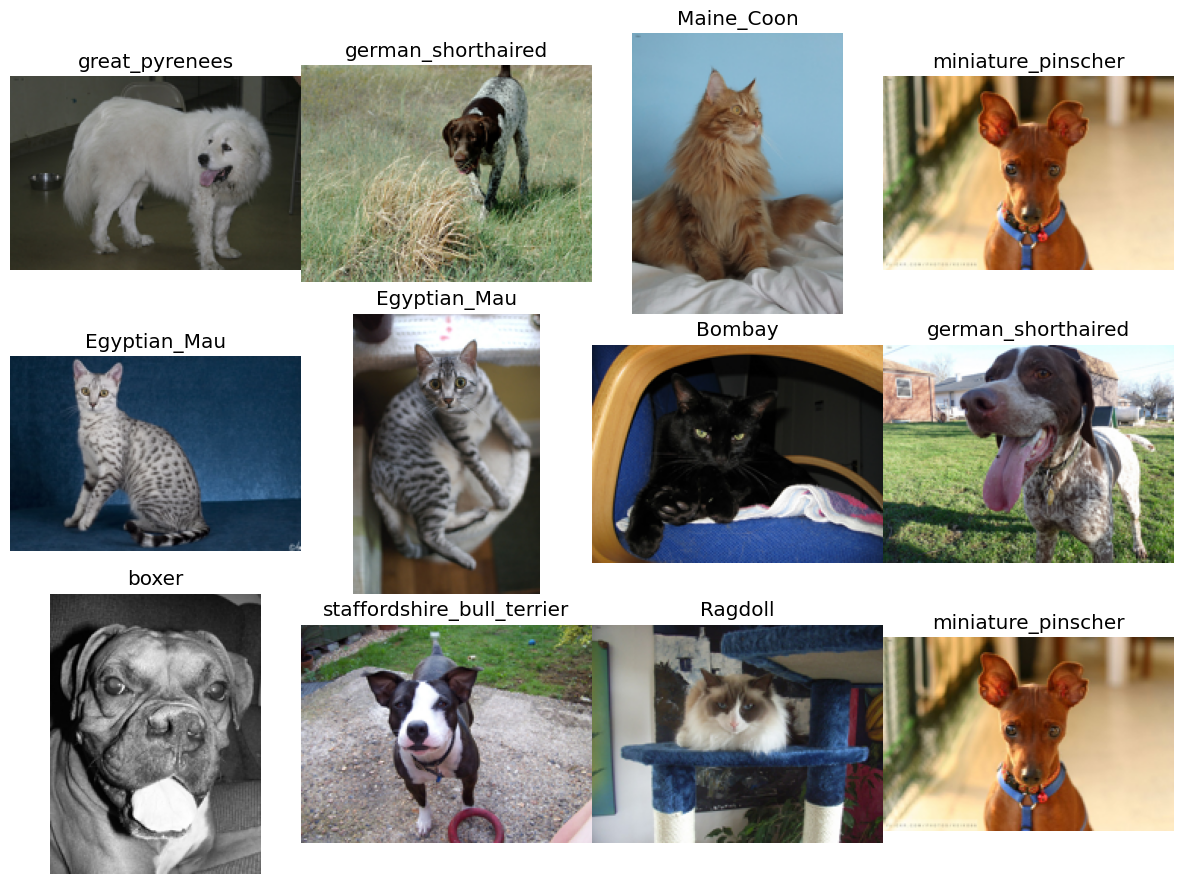

In [ ]:
#Making a figure containing n x m images
linha = 3
coluna = 4
escala = 3
plt.figure(figsize=(coluna*escala,linha*escala))
for index in  range(linha*coluna):
    plt.subplot(linha,coluna,index+1)
    img, label = RandDLS(dls)
    plt.title(label)
    plt.imshow(img.to_thumb(192))
    plt.axis('off')
plt.tight_layout()
plt.subplots_adjust(wspace=0, hspace=0)
plt.show()


##DLS ATOMS REDUZIDO
2 categorias: thomson(10 imagens), stm(10 imagens)

Mounted at /content/drive


In [ ]:
path = Path('/content/drive/MyDrive/Colab Notebooks/fast.ai/fastbook/Datasets/atoms')

Abaixo, a construção do `dataloader` começa com `Datablocks`.

In [ ]:
atoms = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

In [ ]:
BatchSize = 32 #Neste caso todas as imagens são carregadas de uma vez (BatchSize > len(dls.dataset))
dls = atoms.dataloaders(path, batch_size=BatchSize, shuffle=False, num_workers=2)

In [ ]:
num_epochs = 2
total_samples = len(dls.dataset)
n_iterations = math.ceil(total_samples/BatchSize)
print(total_samples, n_iterations)

16 1


In [ ]:
#Mostra todo dataloadrer (train e valid)
#train = 0, valid = 1
for c, n in enumerate(dls):
  print(f'Dataset#{c} com {len(n)} items')
  for c, (i, l) in enumerate(n):
    if c%1 == 0 or not(c) or i.shape[0] != BatchSize:
      print(f'Batch#{c} | Batch image shape: {i.shape} | Batch label shape: {l.shape} |Shape inage batch[0]: {i[0].shape} | Shape Nome batch[0]: {dls.vocab[l[0].item()]}')


Dataset#0 com 1 items
Batch#0 | Batch image shape: torch.Size([16, 3, 128, 128]) | Batch label shape: torch.Size([16]) |Shape inage batch[0]: torch.Size([3, 128, 128]) | Shape Nome batch[0]: stm
Dataset#1 com 1 items
Batch#0 | Batch image shape: torch.Size([4, 3, 128, 128]) | Batch label shape: torch.Size([4]) |Shape inage batch[0]: torch.Size([3, 128, 128]) | Shape Nome batch[0]: stm


In [ ]:
#Quantidade de imagens
len((path/'stm').ls()), len((path/'thomson').ls()) #20 imagens

(10, 10)

In [ ]:
fns = get_image_files(path) #liks de imagens
failed = verify_images(fns) #verifica imagens
len(fns) #Quantidade de links
#20

20

In [ ]:
#TRAIN dls[0]
for e in range(num_epochs):
  print(f'Época: {e+1}')
  for c, (i, l) in enumerate(dls.train):
    if c%1 == 0 or not(c) or i.shape[0] != BatchSize:
      print(f'Batch#{c} | Batch image shape: {i.shape} | Batch label shape: {l.shape} |Shape inage batch[0]: {i[0].shape} | Shape Nome batch[0]: {dls.vocab[l[0].item()]}')


Época: 1
Batch#0 | Batch image shape: torch.Size([16, 3, 128, 128]) | Batch label shape: torch.Size([16]) |Shape inage batch[0]: torch.Size([3, 128, 128]) | Shape Nome batch[0]: stm
Época: 2
Batch#0 | Batch image shape: torch.Size([16, 3, 128, 128]) | Batch label shape: torch.Size([16]) |Shape inage batch[0]: torch.Size([3, 128, 128]) | Shape Nome batch[0]: stm


In [ ]:
#VALID dls[1]
for e in range(num_epochs):
  print(f'Época: {e+1}')
  for c, (i, l) in enumerate(dls.valid):
    if c%5 == 0 or not(c) or i.shape[0] != BatchSize:
      print(f'Batch#{c} | Batch image shape: {i.shape} | Batch label shape: {l.shape} |Shape inage batch[0]: {i[0].shape} | Shape Nome batch[0]: {dls.vocab[l[0].item()]}')


Época: 1
Batch#0 | Batch image shape: torch.Size([4, 3, 128, 128]) | Batch label shape: torch.Size([4]) |Shape inage batch[0]: torch.Size([3, 128, 128]) | Shape Nome batch[0]: stm
Época: 2
Batch#0 | Batch image shape: torch.Size([4, 3, 128, 128]) | Batch label shape: torch.Size([4]) |Shape inage batch[0]: torch.Size([3, 128, 128]) | Shape Nome batch[0]: stm


In [ ]:
#Retorna uma imagem aleatória no Dataloader
def RandDLS(DTS):
  n = int(len(DTS.dataset)*random.random())
  return DTS.dataset[n][0],  DTS.vocab[DTS.dataset[n][1].item()]

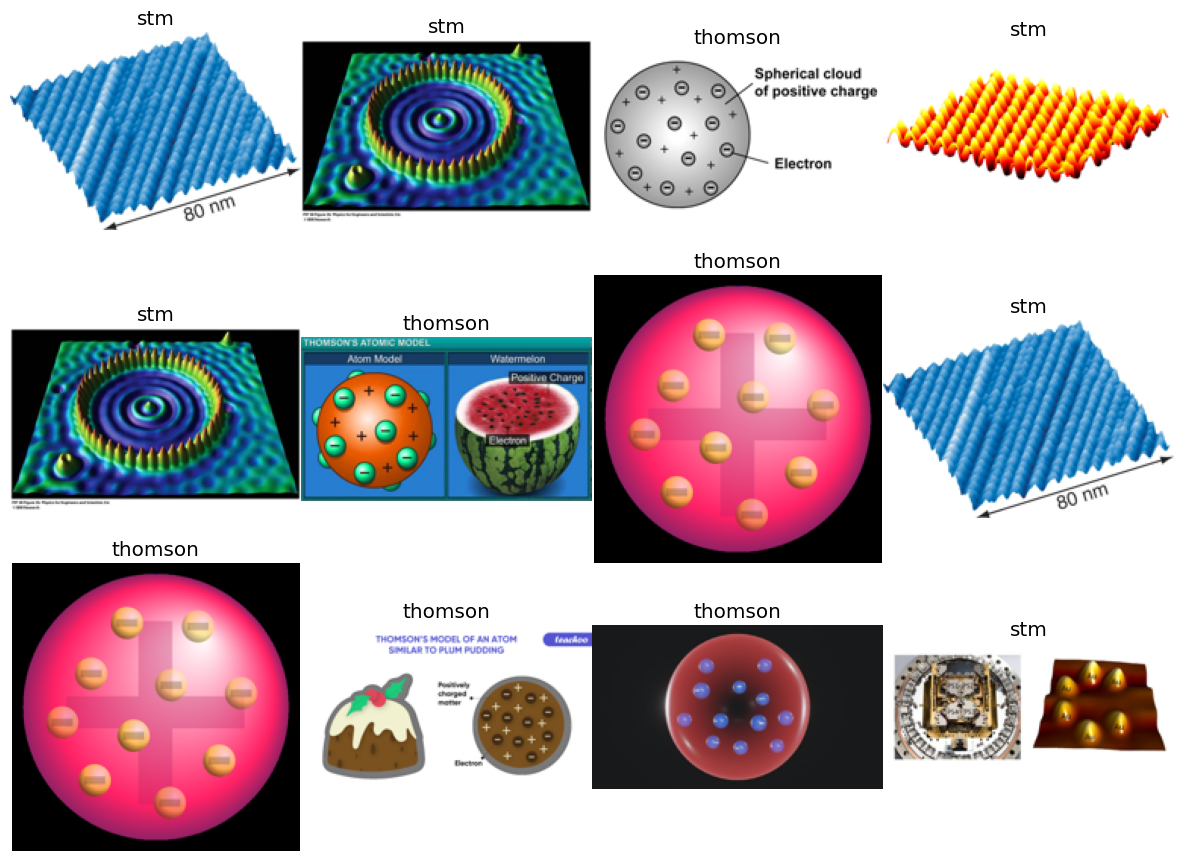

In [ ]:
#Making a figure containing n x m images aleatórias
#Imagens a partir de dataset, portanto sem transformações
linha = 3
coluna = 4
escala = 3
plt.figure(figsize=(coluna*escala,linha*escala))
for index in  range(linha*coluna):
    plt.subplot(linha,coluna,index+1)
    img, label = RandDLS(dls) #Imagens de dataset
    plt.title(label)
    plt.imshow(img.to_thumb(192))
    plt.axis('off')
plt.tight_layout()
plt.subplots_adjust(wspace=0, hspace=0)
plt.show()


In [ ]:
#Making a figure containing train images
#Imagens carregadas de Dataloader, portanto transformadas
import torch
import torchvision
import torchvision.transforms as T
from PIL import Image
transform = T.ToPILImage()
linha = 4
coluna = 4
escala = 4
plt.figure(figsize=(coluna*escala,linha*escala))
for batch in dls.train: #From dataloader train
  pass
for index in  range(16):
    plt.subplot(linha,coluna,index+1)
    img, lbl = batch[0][index], batch[1][index]
    img2 = transform(img)
    plt.title(dls.vocab[lbl])
    plt.imshow(img2)
    plt.axis('off')
plt.tight_layout()
plt.subplots_adjust(wspace=1, hspace=1)
plt.show()


Época: 0
Época: 1
Época: 2
Época: 3
Época: 4


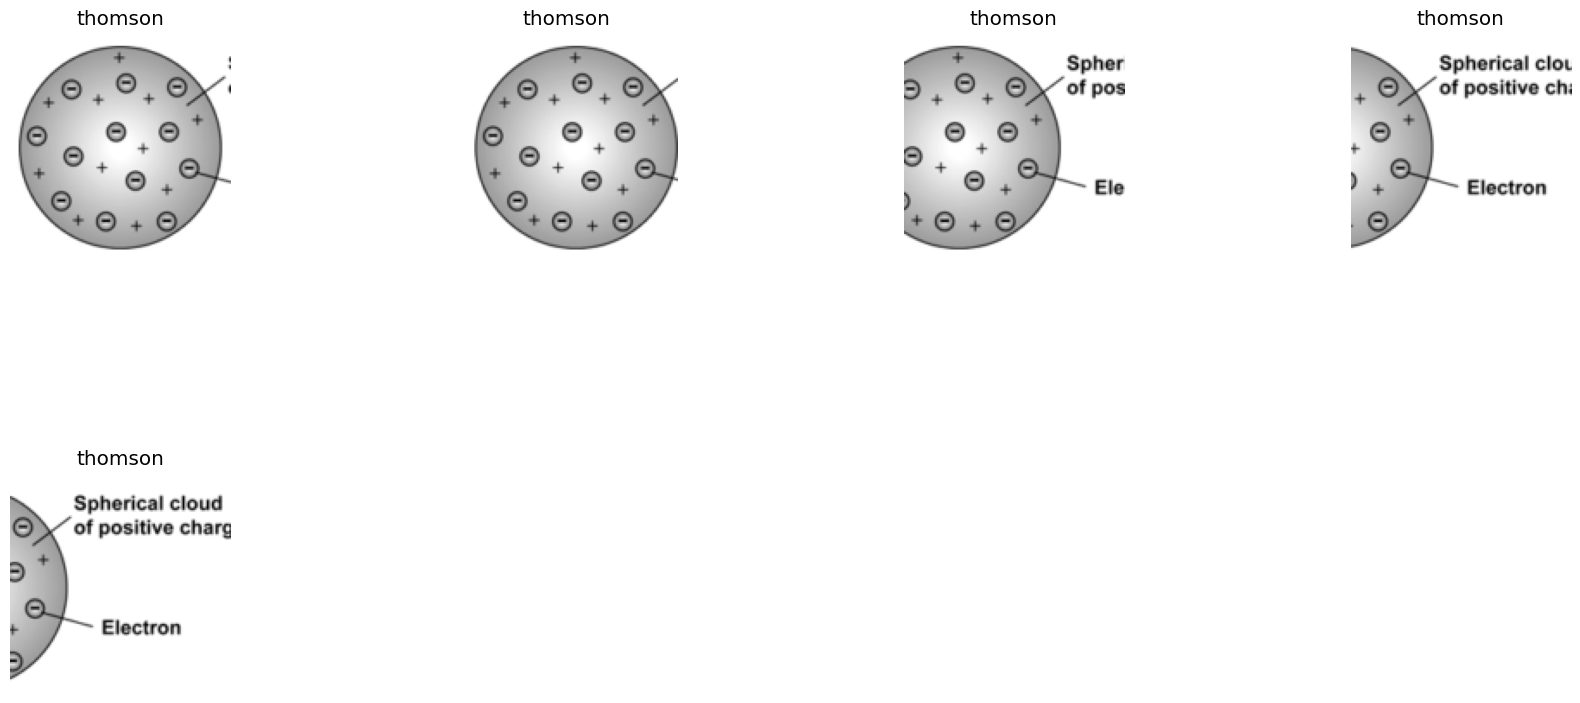

In [ ]:
#Apresenta a mesma imagem com diferentes transformações
#Cada vez que o dataloader carrega mostra diferente

import torch
import torchvision
import torchvision.transforms as T
from PIL import Image
transform = T.ToPILImage()
linha = 4
coluna = 4
escala = 4
plt.figure(figsize=(coluna*escala,linha*escala))
testfig = 10 # índice da imagem em batch
ep = 5  #Épocas

for index in  range(ep):
    print(f'Época: {index}')
    for batch in dls.train: #Carrega batch
      pass
    plt.subplot(linha,coluna,index+1)
    img, lbl = batch[0][testfig], batch[1][testfig]
    img2 = transform(img)
    plt.title(dls.vocab[lbl])
    plt.imshow(img2)
    plt.axis('off')
plt.tight_layout()
plt.subplots_adjust(wspace=1, hspace=1)
plt.show()


##PYTORCH TUTORIAL
https://pytorch.org/tutorials/beginner/basics/data_tutorial.html

###IMPORTS PYTORCH

In [ ]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

##DATUM LEARNER
https://www.youtube.com/watch?v=_BxXrFStVOQ&t=117s

In [ ]:
#IMPORTS
import torch
from torch.utils.data import Dataset, DataLoader
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification

In [ ]:
train, target = make_classification(n_samples=5000, n_features=10, n_informative=8, random_state=42, n_classes=2 )

In [ ]:
train_pd = pd.DataFrame(train)

In [ ]:
train_pd.head()

,0,1,2,3,4,5,6,7,8,9
0,-0.954698,-5.024900,-1.325598,0.651199,-0.904957,5.110270,5.540204,-1.499132,-2.387684,-4.107063
1,1.719036,-4.853862,-4.828796,4.318680,-3.129748,-1.574312,1.298912,4.367639,0.739433,0.508207
2,0.252386,0.252126,-0.815383,-0.851713,-2.072995,-3.723329,-0.646902,-0.797961,-1.344175,-2.218642
3,0.658385,1.130140,0.856906,-0.473408,0.535018,-0.983631,0.877345,-0.586471,-0.403549,-1.031167
4,1.105373,-3.907145,-3.308508,1.493344,-0.363136,1.905277,1.176829,-0.636557,-0.973652,-0.989264


In [ ]:
target_pd = pd.DataFrame(target)

In [ ]:
target_pd.head()

,0
0,1
1,1
2,1
3,1
4,1


In [ ]:
class CustDatPd(Dataset): #Pandas
  def __init__(self, train, target):
    self.train = train
    self.target = target
  def __len__(self):
    return self.train.shape[0]
  def __getitem__(self, idx):
    dp = self.train.iloc[idx].values
    targ = self.target[idx]
    dp = torch.from_numpy(dp)
    targ = torch.tensor(targ)
    return dp, targ

In [ ]:
class CustDat(Dataset): #not Pandas
  def __init__(self, train, target):
    self.train = train
    self.target = target
  def __len__(self):
    return self.train.shape[0]
  def __getitem__(self, idx):
    dp = self.train[idx]
    targ = self.target[idx]
    dp = torch.from_numpy(dp)
    targ = torch.tensor(targ)
    return dp, targ

In [ ]:
cd = CustDat(train, target)

In [ ]:
cd_pd = CustDatPd(train_pd, target_pd)

In [ ]:
n_cd = CustDat(train, target)
#n_cd_pd = Dataset(train_pd, target_pd)

In [ ]:
DataLoader()

In [ ]:
dl = DataLoader(cd,
                batch_size=4,
                shuffle=True,
                num_workers=1,
                pin_memory=False)

In [ ]:
dl_pd = DataLoader(cd_pd,
                batch_size=4,
                shuffle=True,
                num_workers=1,
                pin_memory=False)

In [ ]:
len(dl), len(dl_pd)

(1250, 1250)

In [ ]:
len(dl.dataset.train), len(dl_pd.dataset.train)

(5000, 5000)

In [ ]:
for data in dl.dataset.train:
  print(data)
  break

tensor([-0.9547, -5.0249, -1.3256,  0.6512, -0.9050,  5.1103,  5.5402, -1.4991,
        -2.3877, -4.1071], dtype=torch.float64)


In [ ]:
data in dl

##PyTorch Tutorial 09 - Dataset and DataLoader - Batch Training
https://www.youtube.com/watch?v=PXOzkkB5eH0&t=398s

###ORIGINAL CODE WINE

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import torch
import torchvision
from torch.utils.data import Dataset, DataLoader
import numpy as np
import math

Mounted at /content/drive


In [ ]:
class WineDataset(Dataset):
  def __init__(self):
    #Data loading
    xy = np.loadtxt('/content/drive/MyDrive/Colab Notebooks/fast.ai/fastbook/Datasets/wine.csv', delimiter=',', dtype=np.float32, skiprows=1)
    self.x=xy[:,1 :]
    self.y=xy[:,[0]]
    self.n_samples = xy.shape[0]
  def __getitem__(self, index):
    return self.x[index], self.y[index]
  def __len__(self):
    return self.n_samples

In [ ]:
BatchSize = 4

In [ ]:
dataloader = DataLoader(WineDataset(), batch_size=BatchSize, shuffle=False, num_workers=2)

In [ ]:
dataset = WineDataset()
dataloader = DataLoader(dataset=dataset, batch_size=BatchSize, shuffle=False, num_workers=2)

In [ ]:
num_epochs = 2
total_samples = len(WineDataset())
n_iterations = math.ceil(total_samples/BatchSize)
print(total_samples, n_iterations)

178 45


In [ ]:
for epoch in range(num_epochs):
  for i, (inputs, labels) in enumerate(dataloader):
    if not((i+1)%5) or not(i):
      print(f'epoch: {epoch+1}/{num_epochs}, step: {i+1}/{n_iterations}, input shape: {inputs.shape}, input#{1+i*4}[0]: {inputs[0,0]:.2f} label[0]: {int(labels[0].item())}')

epoch: 1/2, step: 1/45, input shape: torch.Size([4, 13]), input#1[0]: 14.23 label[0]: 1
epoch: 1/2, step: 5/45, input shape: torch.Size([4, 13]), input#17[0]: 14.30 label[0]: 1
epoch: 1/2, step: 10/45, input shape: torch.Size([4, 13]), input#37[0]: 13.28 label[0]: 1
epoch: 1/2, step: 15/45, input shape: torch.Size([4, 13]), input#57[0]: 14.22 label[0]: 1
epoch: 1/2, step: 20/45, input shape: torch.Size([4, 13]), input#77[0]: 13.03 label[0]: 2
epoch: 1/2, step: 25/45, input shape: torch.Size([4, 13]), input#97[0]: 11.81 label[0]: 2
epoch: 1/2, step: 30/45, input shape: torch.Size([4, 13]), input#117[0]: 11.82 label[0]: 2
epoch: 1/2, step: 35/45, input shape: torch.Size([4, 13]), input#137[0]: 12.25 label[0]: 3
epoch: 1/2, step: 40/45, input shape: torch.Size([4, 13]), input#157[0]: 13.84 label[0]: 3
epoch: 1/2, step: 45/45, input shape: torch.Size([2, 13]), input#177[0]: 13.17 label[0]: 3
epoch: 2/2, step: 1/45, input shape: torch.Size([4, 13]), input#1[0]: 14.23 label[0]: 1
epoch: 2/2,

###MY CODE WINE

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import torch
import torchvision
from torch.utils.data import Dataset, DataLoader
import numpy as np
import math


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
xy = np.loadtxt('/content/drive/MyDrive/Colab Notebooks/fast.ai/fastbook/Datasets/wine.csv', delimiter=',', dtype=np.float32, skiprows=1)

In [ ]:
x=xy[:,1 :]
y=xy[:,[0]]

In [ ]:
class WineDataset(Dataset):
  def __init__(self, x, y):
    self.x=x
    self.y=y
    self.n_samples = len(x)
  def __getitem__(self, index):
    return self.x[index], self.y[index]
  def __len__(self):
    return self.n_samples

In [ ]:
BatchSize = 4

In [ ]:
dataloader = DataLoader(WineDataset(x,y), batch_size=BatchSize, shuffle=False, num_workers=2)

In [ ]:
num_epochs = 2
total_samples = WineDataset(x,y).__len__()
n_iterations = math.ceil(total_samples/BatchSize)
print(total_samples, n_iterations)

178 45


In [ ]:
for epoch in range(num_epochs):
  for i, (inputs, labels) in enumerate(dataloader):
    if not((i+1)%5) or not(i):
      print(f'epoch: {epoch+1}/{num_epochs}, step: {i+1}/{n_iterations}, input shape: {inputs.shape}, input#{1+i*4}[0]: {inputs[0,0]:.2f} label[0]: {int(labels[0].item())}')

epoch: 1/2, step: 1/45, input shape: torch.Size([4, 13]), input#1[0]: 14.23 label[0]: 1
epoch: 1/2, step: 5/45, input shape: torch.Size([4, 13]), input#17[0]: 14.30 label[0]: 1
epoch: 1/2, step: 10/45, input shape: torch.Size([4, 13]), input#37[0]: 13.28 label[0]: 1
epoch: 1/2, step: 15/45, input shape: torch.Size([4, 13]), input#57[0]: 14.22 label[0]: 1
epoch: 1/2, step: 20/45, input shape: torch.Size([4, 13]), input#77[0]: 13.03 label[0]: 2
epoch: 1/2, step: 25/45, input shape: torch.Size([4, 13]), input#97[0]: 11.81 label[0]: 2
epoch: 1/2, step: 30/45, input shape: torch.Size([4, 13]), input#117[0]: 11.82 label[0]: 2
epoch: 1/2, step: 35/45, input shape: torch.Size([4, 13]), input#137[0]: 12.25 label[0]: 3
epoch: 1/2, step: 40/45, input shape: torch.Size([4, 13]), input#157[0]: 13.84 label[0]: 3
epoch: 1/2, step: 45/45, input shape: torch.Size([2, 13]), input#177[0]: 13.17 label[0]: 3
epoch: 2/2, step: 1/45, input shape: torch.Size([4, 13]), input#1[0]: 14.23 label[0]: 1
epoch: 2/2,

###RANDOM MY CODE 1

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import torch
import torchvision
from torch.utils.data import Dataset, DataLoader
import numpy as np
import math
import pandas as pd
from sklearn.datasets import make_classification

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Cria um dataset randômico
#Note que são 5000 amostras
training, targets = make_classification(n_samples=5000, n_features=10, n_informative=8, random_state=42, n_classes=10 )
#Envia para o tensor
train, target = torch.tensor(training), torch.tensor(targets)
#Cria um dataframe Pandas
trainPd, targetPd = pd.DataFrame(train), pd.DataFrame(target)
Pdtrain_tg = pd.concat([trainPd, targetPd], axis="columns")

class RandDataset(Dataset):
  def __init__(self, tr, tg):
    #Data loading
    self.x=tr
    self.y=tg
    self.n_samples = tg.shape[0]
  def __getitem__(self, index):
    return self.x[index], self.y[index]
  def __len__(self):
    return self.n_samples

In [ ]:
BatchSize = 256
#Instancia o dataset
#dataset = RandDataset(train,target)

#Cria o dataloader
dataloader = DataLoader(RandDataset(train,target), BatchSize, shuffle=False, num_workers=2)

num_epochs = 2
total_samples = len(RandDataset(train,target))
n_iterations = math.ceil(total_samples/BatchSize)
print(total_samples, n_iterations)

5000 20


In [ ]:
BatchSize = 256
#Instancia o dataset
dataset = RandDataset(train,target)
#Cria o dataloader
dataloader = DataLoader(dataset=dataset, batch_size=BatchSize, shuffle=False, num_workers=2)

num_epochs = 2
total_samples = len(dataset)
n_iterations = math.ceil(total_samples/BatchSize)
print(total_samples, n_iterations)

5000 20


In [ ]:
for epoch in range(num_epochs):
  for i, (inputs, labels) in enumerate(dataloader):
    if not((i+1)%5) or not(i):
      print(f'epoch: {epoch+1}/{num_epochs}, step: {i+1}/{n_iterations}, input shape: {inputs.shape}, input_tensor#{i*BatchSize}[0]: {inputs[0,0]:.2f}, input_data#{i*BatchSize}[0]: {train[0,0]:.2f} label[0]: {int(labels[0].item())}')



epoch: 1/2, step: 1/20, input shape: torch.Size([256, 10]), input_tensor#0[0]: 1.16, input_data#0[0]: 1.16 label[0]: 2
epoch: 1/2, step: 5/20, input shape: torch.Size([256, 10]), input_tensor#1024[0]: 2.07, input_data#1024[0]: 1.16 label[0]: 1
epoch: 1/2, step: 10/20, input shape: torch.Size([256, 10]), input_tensor#2304[0]: -1.25, input_data#2304[0]: 1.16 label[0]: 2
epoch: 1/2, step: 15/20, input shape: torch.Size([256, 10]), input_tensor#3584[0]: -0.01, input_data#3584[0]: 1.16 label[0]: 9
epoch: 1/2, step: 20/20, input shape: torch.Size([136, 10]), input_tensor#4864[0]: -2.07, input_data#4864[0]: 1.16 label[0]: 0
epoch: 2/2, step: 1/20, input shape: torch.Size([256, 10]), input_tensor#0[0]: 1.16, input_data#0[0]: 1.16 label[0]: 2
epoch: 2/2, step: 5/20, input shape: torch.Size([256, 10]), input_tensor#1024[0]: 2.07, input_data#1024[0]: 1.16 label[0]: 1
epoch: 2/2, step: 10/20, input shape: torch.Size([256, 10]), input_tensor#2304[0]: -1.25, input_data#2304[0]: 1.16 label[0]: 2
epoc

https://github.com/muellerzr/Practical-Deep-Learning-for-Coders-2.0/blob/master/Computer%20Vision/01_Slides.pdf

https://medium.com/unpackai/data-augmentation-with-fastai-library-b4f8ffb6f00d

##Matlibplot

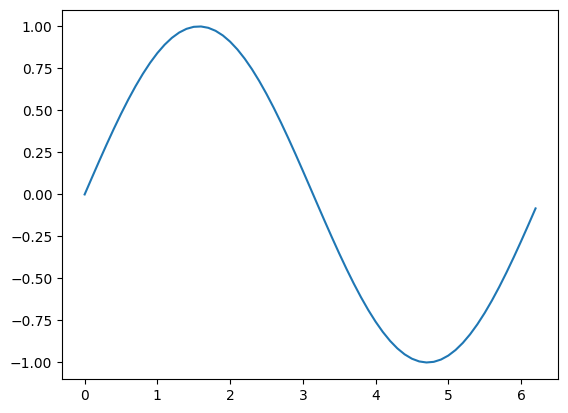

In [ ]:
# importing the required modules
import matplotlib.pyplot as plt
import numpy as np

# setting the x - coordinates
x = np.arange(0, 2*(np.pi), 0.1)
# setting the corresponding y - coordinates
y = np.sin(x)

# plotting the points
plt.plot(x, y)

# function to show the plot
plt.show()


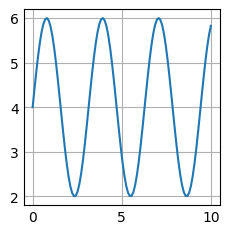

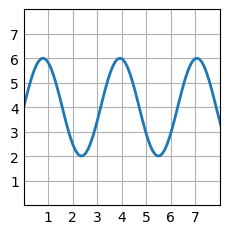

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

#plt.style.use('_mpl-gallery')

# make data
x = np.linspace(0, 10, 100)
y = 4 + 2 * np.sin(2 * x)

plt.plot(x,y)

# plot
fig, ax = plt.subplots()

ax.plot(x, y, linewidth=2.0)

ax.set(xlim=(0, 8), xticks=np.arange(1, 8),
       ylim=(0, 8), yticks=np.arange(1, 8))

plt.show()




##FASHION MINST PYTORCH I

https://medium.com/@aaysbt/fashion-mnist-data-training-using-pytorch-7f6ad71e96f4



In [ ]:
#IMPORTS
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt
import numpy as np
from torch.utils.data.sampler import SubsetRandomSampler
import math

In [ ]:
#Load data
#Tensors
training_data = datasets.FashionMNIST(  #Train & Valid
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)
test_data = datasets.FashionMNIST(  #Test
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

100%|██████████| 26421880/26421880 [00:01<00:00, 16686350.70it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 270458.08it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:00<00:00, 4973026.97it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 11949240.17it/s]


Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [ ]:
#Dataloader
indices = list(range(len(training_data)))
np.random.shuffle(indices)
split = int(np.floor(0.2*len(training_data)))

In [ ]:
train_sample = SubsetRandomSampler(indices[split:])
valid_sample = SubsetRandomSampler(indices[:split])


In [ ]:
BatchSize = 64

In [ ]:
trainloader = torch.utils.data.DataLoader(training_data, sampler=train_sample, batch_size=BatchSize)
validloader = torch.utils.data.DataLoader(training_data, sampler=valid_sample, batch_size=BatchSize)
testloader = torch.utils.data.DataLoader(test_data, shuffle=True, batch_size=BatchSize)

In [ ]:
print(f'Train: {len(train_sample)}  Valid: {len(valid_sample)}  Test: {len(test_data)}')

Train: 48000  Valid: 12000  Test: 10000


In [ ]:
trainloader.__len__(), validloader.__len__(), testloader.__len__()

(750, 188, 157)

In [ ]:
num_epochs = 2
names = [trainloader, validloader, testloader]
for name in names:
  total_samples = name.__len__()
  n_iterations = math.ceil(total_samples/BatchSize)
  print(f'Dataloader: {name} Total de amostras: {total_samples} Quantidade de iterações: {n_iterations}')

Dataloader: <torch.utils.data.dataloader.DataLoader object at 0x7a42907a7a30> Total de amostras: 750 Quantidade de iterações: 12
Dataloader: <torch.utils.data.dataloader.DataLoader object at 0x7a42907a7b50> Total de amostras: 188 Quantidade de iterações: 3
Dataloader: <torch.utils.data.dataloader.DataLoader object at 0x7a42907a7820> Total de amostras: 157 Quantidade de iterações: 3


In [ ]:
num_epochs = 2
names = [trainloader, validloader, testloader]
for name in names:
  total_samples = name.__len__()
  n_iterations = math.ceil(total_samples/BatchSize)
  print(f'Dataloader: {name} Total de amostras: {total_samples} Quantidade de iterações: {n_iterations}')
  for epoch in range(num_epochs):
    for i, (inputs, labels) in enumerate(name):
      if not((i+1)%(BatchSize)) or not(i):
        print(f'epoch: {epoch+1}/{num_epochs}, step: {i+1}/{n_iterations}, input shape: {inputs.shape}, input_tensor#{i*BatchSize}[0]:   {int(labels[0].item())}')

Dataloader: <torch.utils.data.dataloader.DataLoader object at 0x7a42907a7a30> Total de amostras: 750 Quantidade de iterações: 12
epoch: 1/2, step: 1/12, input shape: torch.Size([64, 1, 28, 28]), input_tensor#0[0]:   6
epoch: 1/2, step: 64/12, input shape: torch.Size([64, 1, 28, 28]), input_tensor#4032[0]:   7
epoch: 1/2, step: 128/12, input shape: torch.Size([64, 1, 28, 28]), input_tensor#8128[0]:   5
epoch: 1/2, step: 192/12, input shape: torch.Size([64, 1, 28, 28]), input_tensor#12224[0]:   8
epoch: 1/2, step: 256/12, input shape: torch.Size([64, 1, 28, 28]), input_tensor#16320[0]:   8
epoch: 1/2, step: 320/12, input shape: torch.Size([64, 1, 28, 28]), input_tensor#20416[0]:   7
epoch: 1/2, step: 384/12, input shape: torch.Size([64, 1, 28, 28]), input_tensor#24512[0]:   0
epoch: 1/2, step: 448/12, input shape: torch.Size([64, 1, 28, 28]), input_tensor#28608[0]:   6
epoch: 1/2, step: 512/12, input shape: torch.Size([64, 1, 28, 28]), input_tensor#32704[0]:   2
epoch: 1/2, step: 576/12,

##Fashion MNIST with Pytorch (93% Accuracy)

https://www.kaggle.com/code/pankajj/fashion-mnist-with-pytorch-93-accuracy


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#IMPORTS
import numpy as np
import pandas as pd
#import matplotlib.pyplot as plt
import math

import torch
#import torch.nn as nn
#from torch.autograd import Variable

#import torchvision
#import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader
#from sklearn.metrics import confusion_matrix

In [ ]:
train_csv = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/fast.ai/fastbook/Datasets/fashion-mnist_train.csv")
test_csv = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/fast.ai/fastbook/Datasets/fashion-mnist_test.csv")

In [ ]:
BatchSize = 64

In [ ]:
train_csv_sf = train_csv_sf.sample(frac=1).reset_index(drop=True)

In [ ]:
trainlabel = torch.tensor(train_csv.values[:,0])

In [ ]:
trainimage = torch.tensor(np.array([train_csv.values[x,1:,] for x in range(len(train_csv))]))

In [ ]:
class FMINSTDataset(Dataset):
  def __init__(self, image, label):
    #Data loading
    self.x=image
    self.y=label
    self.n_samples = label.shape[0]
  def __getitem__(self, index):
    return self.x[index], self.y[index]
  def __len__(self):
    return self.n_samples

In [ ]:
traindataset = FMINSTDataset(trainimage,trainlabel)

In [ ]:
testdataset = FMINSTDataset

In [ ]:
train_csv['label'].values

array([2, 9, 6, ..., 8, 8, 7])

In [ ]:
class FashionDataset(Dataset):
    """User defined class to build a datset using Pytorch class Dataset."""
    def __init__(self, data, transform = None):
        """Method to initilaize variables."""
        self.fashion_MNIST = list(data.values)
        self.transform = transform
        label = []
        image = []
        for i in self.fashion_MNIST:
             # first column is of labels.
            label.append(i[0])
            image.append(i[1:])
        self.labels = np.asarray(label)
        # Dimension of Images = 28 * 28 * 1. where height = width = 28 and color_channels = 1.
        self.images = np.asarray(image).reshape(-1, 28, 28, 1).astype('float32')
    def __getitem__(self, index):
        label = self.labels[index]
        image = self.images[index]
        if self.transform is not None:
            image = self.transform(image)
        return image, label
    def __len__(self):
        return len(self.images)

In [ ]:
BatchSize = 64

In [ ]:
# Transform data into Tensor that has a range from 0 to 1
train_set = FashionDataset(train_csv, transform=transforms.Compose([transforms.ToTensor()]))
test_set = FashionDataset(test_csv, transform=transforms.Compose([transforms.ToTensor()]))

In [ ]:
train_loader = DataLoader(train_set, shuffle=True, batch_size=BatchSize, )
test_loader = DataLoader(test_set, shuffle=True, batch_size=BatchSize, )

In [ ]:
train_loader = DataLoader(traindataset, shuffle=True, batch_size=BatchSize, )

In [ ]:
print(f'Train: {train_loader.__len__()}  Test: {len(testloader)}  ')

Train: 938  Test: 157  


In [ ]:
names = [train_loader ]
num_epochs = 2

In [ ]:
#Mostra o geral do Dataloader
for name in names:
  total_samples = name.__len__()
  n_iterations = math.ceil(total_samples/BatchSize)
  print(f'Dataloader: {name} Total de amostras: {total_samples} Quantidade de iterações: {n_iterations}')
  for epoch in range(num_epochs):
    for i, (inputs, labels) in enumerate(name):
      if not((i+1)%(BatchSize)) or not(i):
        print(f'epoch: {epoch+1}/{num_epochs}, step: {i+1}/{n_iterations}, input shape: {inputs.shape}, input_tensor#{i*BatchSize}[0]:   {int(labels[0].item())}')

Dataloader: <fastai.data.load.DataLoader object at 0x7cd7619811e0> Total de amostras: 938 Quantidade de iterações: 15
epoch: 1/2, step: 1/15, input shape: torch.Size([64, 784]), input_tensor#0[0]:   4
epoch: 1/2, step: 64/15, input shape: torch.Size([64, 784]), input_tensor#4032[0]:   6
epoch: 1/2, step: 128/15, input shape: torch.Size([64, 784]), input_tensor#8128[0]:   8
epoch: 1/2, step: 192/15, input shape: torch.Size([64, 784]), input_tensor#12224[0]:   6
epoch: 1/2, step: 256/15, input shape: torch.Size([64, 784]), input_tensor#16320[0]:   1
epoch: 1/2, step: 320/15, input shape: torch.Size([64, 784]), input_tensor#20416[0]:   0
epoch: 1/2, step: 384/15, input shape: torch.Size([64, 784]), input_tensor#24512[0]:   5
epoch: 1/2, step: 448/15, input shape: torch.Size([64, 784]), input_tensor#28608[0]:   5
epoch: 1/2, step: 512/15, input shape: torch.Size([64, 784]), input_tensor#32704[0]:   1
epoch: 1/2, step: 576/15, input shape: torch.Size([64, 784]), input_tensor#36800[0]:   1
e

##FASHION MINST FASTAI
https://www.kaggle.com/code/shanekonaung/fashion-mnist-with-fastai

https://github.com/alexanch/fashion-mnist-fastai/blob/master/Image%20classification%20w_%20fastai%20%5Bfashion%20MNIST%5D.ipynb



In [ ]:
#IMPORTS
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt
import numpy as np
from torch.utils.data.sampler import SubsetRandomSampler
import math

In [ ]:
! [ -e /content ] && pip install -Uqq fastbook
import fastbook
from fastbook import *

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 67.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.6/519.6 kB 34.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 64.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 19.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 12.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 25.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 83.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 60.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 70.3 MB/s eta 0:00:00


In [ ]:
#Load data
#Tensors
training_data = datasets.FashionMNIST(  #Train & Valid
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)
test_data = datasets.FashionMNIST(  #Test
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

100%|██████████| 26421880/26421880 [00:01<00:00, 16686350.70it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 270458.08it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:00<00:00, 4973026.97it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 11949240.17it/s]


Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [ ]:
#Dataloader
indices = list(range(len(training_data)))
np.random.shuffle(indices)
split = int(np.floor(0.2*len(training_data)))

In [ ]:
train_sample = SubsetRandomSampler(indices[split:])
valid_sample = SubsetRandomSampler(indices[:split])


In [ ]:
BatchSize = 64

In [ ]:
trainloader = torch.utils.data.DataLoader(training_data, sampler=train_sample, batch_size=BatchSize)
validloader = torch.utils.data.DataLoader(training_data, sampler=valid_sample, batch_size=BatchSize)
testloader = torch.utils.data.DataLoader(test_data, shuffle=True, batch_size=BatchSize)

In [ ]:
trainloader.__len__(), validloader.__len__(), testloader.__len__()

(750, 188, 157)

In [ ]:
num_epochs = 2
names = [trainloader, validloader, testloader]
for name in names:
  total_samples = name.__len__()
  n_iterations = math.ceil(total_samples/BatchSize)
  print(f'Dataloader: {name} Total de amostras: {total_samples} Quantidade de iterações: {n_iterations}')

Dataloader: <torch.utils.data.dataloader.DataLoader object at 0x7a42907a7a30> Total de amostras: 750 Quantidade de iterações: 12
Dataloader: <torch.utils.data.dataloader.DataLoader object at 0x7a42907a7b50> Total de amostras: 188 Quantidade de iterações: 3
Dataloader: <torch.utils.data.dataloader.DataLoader object at 0x7a42907a7820> Total de amostras: 157 Quantidade de iterações: 3


In [ ]:
num_epochs = 2
names = [trainloader, validloader, testloader]
for name in names:
  total_samples = name.__len__()
  n_iterations = math.ceil(total_samples/BatchSize)
  print(f'Dataloader: {name} Total de amostras: {total_samples} Quantidade de iterações: {n_iterations}')
  for epoch in range(num_epochs):
    for i, (inputs, labels) in enumerate(name):
      if not((i+1)%(BatchSize)) or not(i):
        print(f'epoch: {epoch+1}/{num_epochs}, step: {i+1}/{n_iterations}, input shape: {inputs.shape}, input_tensor#{i*BatchSize}[0]:   {int(labels[0].item())}')

###Iterating and Visualizing the Dataset

In [ ]:
img = PIL.Image.open(training_data[0][0].item())

In [ ]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

In [ ]:
y = [e for e in test_data[e][1]]

In [ ]:
class FashionMinstDataset_Test(Dataset):
  def __init__(self, x, y):
    self.x=x
    self.y=y
    self.n_samples = len(x)
  def __getitem__(self, index):
    return self.x[index], self.y[index]
  def __len__(self):
    return self.n_samples

In [ ]:
BatchSize = 4

In [ ]:
dataloader = DataLoader(WineDataset(x,y), batch_size=BatchSize, shuffle=False, num_workers=2)

##Fashion MNIST with Pytorch - Meu Código

https://www.kaggle.com/code/pankajj/fashion-mnist-with-pytorch-93-accuracy

https://www.kaggle.com/code/alexanch/image-classification-w-fastai-fashion-mnist/notebook


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#IMPORTS
import numpy as np
import pandas as pd
import math
import torch
from torch.utils.data import Dataset, DataLoader

In [ ]:
train_valid_csv = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/fast.ai/fastbook/Datasets/fashion-mnist_train.csv")
test_csv = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/fast.ai/fastbook/Datasets/fashion-mnist_test.csv")

In [ ]:
train_valid_csv = train_valid_csv.sample(frac=1).reset_index(drop=True)

In [ ]:
BatchSize = 64

In [ ]:
slc =len(train_valid_csv.values[:,0]) - int(0.2*len(train_valid_csv.values[:,0]))

In [ ]:
train_csv = train_valid_csv.values[:slc]

In [ ]:
valid_csv = train_valid_csv.values[slc:]

In [ ]:
trainlabel = torch.tensor(train_csv[:,0])
validlabel = torch.tensor(valid_csv[:,0])
testlabel = torch.tensor(test_csv.values[:,0])

In [ ]:
trainimage = torch.tensor(np.array([train_csv[x,1:,] for x in range(train_csv.shape[0])]))
validimage = torch.tensor(np.array([valid_csv[x,1:,] for x in range(valid_csv.shape[0])]))
testimage = torch.tensor(np.array([test_csv.values[x,1:,] for x in range(test_csv.values.shape[0])]))

In [ ]:
class FMINSTDataset(Dataset):
  def __init__(self, image, label):
    #Data loading
    self.x=image
    self.y=label
    self.n_samples = label.shape[0]
  def __getitem__(self, index):
    return self.x[index], self.y[index]
  def __len__(self):
    return self.n_samples

In [ ]:
traindataset = FMINSTDataset(trainimage,trainlabel)
validdataset = FMINSTDataset(validimage,validlabel)
testdataset = FMINSTDataset(testimage,testlabel)

In [ ]:
train_loader = DataLoader(traindataset, shuffle=True, batch_size=BatchSize, )
valid_loader = DataLoader(validdataset, shuffle=True, batch_size=BatchSize, )
test_loader = DataLoader(testdataset, shuffle=True, batch_size=BatchSize, )

In [ ]:
print(f'Train: {train_loader.__len__()}  Valid: {valid_loader.__len__()}  Test: {test_loader.__len__()}  ')

Train: 750  Valid: 188  Test: 157  


In [ ]:
names = [train_loader, valid_loader, test_loader ]
num_epochs = 2

In [ ]:
#Mostra o geral do Dataloader
for name in names:
  total_samples = name.__len__()
  n_iterations = math.ceil(total_samples/BatchSize)
  print(f'Dataloader: {name} Total de amostras: {total_samples} Quantidade de iterações: {n_iterations}')
  for epoch in range(num_epochs):
    for i, (inputs, labels) in enumerate(name):
      if not((i+1)%(BatchSize)) or not(i):
        print(f'epoch: {epoch+1}/{num_epochs}, step: {i+1}/{n_iterations}, input shape: {inputs.shape}, input_tensor#{i*BatchSize}[0]:   {int(labels[0].item())}')

Dataloader: <torch.utils.data.dataloader.DataLoader object at 0x7830c6478af0> Total de amostras: 750 Quantidade de iterações: 12
epoch: 1/2, step: 1/12, input shape: torch.Size([64, 784]), input_tensor#0[0]:   7
epoch: 1/2, step: 64/12, input shape: torch.Size([64, 784]), input_tensor#4032[0]:   9
epoch: 1/2, step: 128/12, input shape: torch.Size([64, 784]), input_tensor#8128[0]:   6
epoch: 1/2, step: 192/12, input shape: torch.Size([64, 784]), input_tensor#12224[0]:   6
epoch: 1/2, step: 256/12, input shape: torch.Size([64, 784]), input_tensor#16320[0]:   6
epoch: 1/2, step: 320/12, input shape: torch.Size([64, 784]), input_tensor#20416[0]:   0
epoch: 1/2, step: 384/12, input shape: torch.Size([64, 784]), input_tensor#24512[0]:   4
epoch: 1/2, step: 448/12, input shape: torch.Size([64, 784]), input_tensor#28608[0]:   6
epoch: 1/2, step: 512/12, input shape: torch.Size([64, 784]), input_tensor#32704[0]:   0
epoch: 1/2, step: 576/12, input shape: torch.Size([64, 784]), input_tensor#3680

##Image classification w/ fastai [fashion MNIST] - Meu Código

https://www.kaggle.com/code/alexanch/image-classification-w-fastai-fashion-mnist/notebook

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
! [ -e /content ] && pip install -Uqq fastbook
import fastbook
from fastbook import *

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 26.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.6/519.6 kB 32.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 37.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 18.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 14.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 18.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 54.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 58.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 60.7 MB/s eta 0:00:00


In [ ]:
#IMPORTS
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from fastai.vision import *
from PIL import Image
import os
import pathlib

In [ ]:
path_data = pathlib.Path('./data')
path_data.mkdir(parents = False, exist_ok = False)

In [ ]:
path_train = pathlib.Path('./data/train')
path_train.mkdir(parents = False, exist_ok = False)

In [ ]:
path_test = pathlib.Path('./data/test')
path_test.mkdir(parents = False, exist_ok = False)

In [ ]:
mnist_train = pd.read_csv('/content/data/fashion-mnist_train.csv')
mnist_test = pd.read_csv('/content/data/fashion-mnist_test.csv')

In [ ]:
mnist_test = pd.read_csv('/content/data/fashion-mnist_test.txt')

In [ ]:
def csv2img(csv,path='/kaggle/working/train/'):
    """
    Convert pixel values from .csv to .png image
    """
    for i in range(len(csv)):
        # csv.iloc[i,1:].to_numpy() returns pixel values array for i'th imag excluding the label
        # next step: reshape the array to original shape(28,28) and add missing color channels
        result = Image.fromarray(np.uint8(np.stack(np.rot90(csv.iloc[i,1:].to_numpy().reshape((28,28)))*3,axis=-1)))
        # save the image:
        result.save(f'{path}/{str(mnist_train.iloc[i,0])}_{str(i)}.png')
        if (i%1000 == 0) and not(i):
          print(f'{i} images were created.')

    print(f'{len(csv)} images were created.')

In [ ]:
csv2img(mnist_train, path_train)

0 images were created.
60000 images were created.


In [ ]:
csv2img(mnist_test, path_test)

0 images were created.
10000 images were created.


In [ ]:
Fminst = DataBlock(blocks = (ImageBlock, CategoryBlock),
                 get_items=get_image_files,
                 splitter=RandomSplitter(valid_pct=0.2,seed=42),  #splitter is a callable which, when called with items, returns a tuple of iterables
                                                    #representing the indices of the training and validation data.
                 get_y=using_attr(RegexLabeller(r'^(.+)_\d+.png$'), 'name')
                 )

In [ ]:
BatchSize = 64
dls = Fminst.dataloaders(path_train, batch_size=BatchSize, shuffle=True, num_workers=2,)

In [ ]:
Fminst_test = DataBlock(blocks = (ImageBlock, CategoryBlock),
                 get_items=get_image_files,
                 splitter=RandomSplitter(valid_pct=0.0, seed=42), #splitter is a callable which, when called with items, returns a tuple of iterables
                                                                  #representing the indices of the training and validation data. valid_pct=0.0 For TEST
                 get_y=using_attr(RegexLabeller(r'^(.+)_\d+.png$'), 'name')
                 )

In [ ]:
BatchSize = 64
dls_test = Fminst_test.dataloaders(path_test, batch_size=BatchSize, shuffle=True, num_workers=2,)

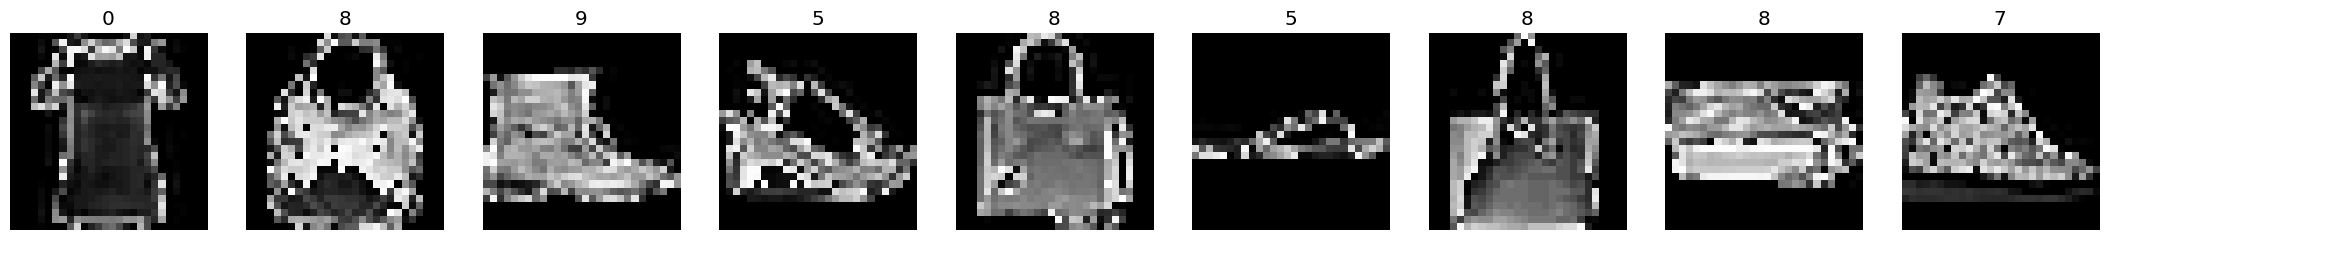

In [ ]:
dls.train.show_batch(nrows=1, ncols=10)

In [ ]:
names = {'Train':dls.train, 'Valid':dls.valid, 'Test':dls_test[0]}
num_epochs = 2

In [ ]:
#Mostra o geral do Dataloader
for name in names:
  dls = names[name]
  total_samples = dls.__len__()
  n_iterations = math.ceil(total_samples/BatchSize)
  print(f'Dataloader: {name} | Total de amostras: {total_samples} | Quantidade de iterações: {n_iterations}')
  for epoch in range(num_epochs):
    for i, (inputs, labels) in enumerate(dls):
      if not((i+1)%(100)) or not(i):
        print(f'epoch: {epoch+1}/{num_epochs}, step: {i+1}/{n_iterations}, input shape: {inputs.shape}, input_tensor#{i*BatchSize}[0]:   {int(labels[0].item())}')

In [ ]:
import requests

In [ ]:
URL = "https://drive.google.com/file/d/1bIBaPc6Mky0JFGlf99St5PILfdVYj9Eh/view?usp=sharing"
response = requests.get(URL)

In [ ]:
open("test.jpg", "wb").write(response.content)


83214

In [ ]:
img = Image.open('/content/test.jpg')
img

UnidentifiedImageError: ignored